# Data Understanding

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Read the csv data
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
housing.shape

(1460, 81)

# Exploratory Data Analysis

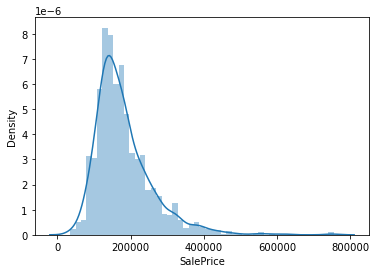

In [6]:
# SalePrice is out target variable. Lets look at it. 
sns.distplot(housing['SalePrice'])
plt.show()

The plot is left skewed !
We will handle this in Data preparation section.

In [7]:
# removing 'Id' column as it is insignificant
housing = housing.drop(columns=['Id'])
housing.shape

(1460, 80)

### Derived Variable

In [ ]:
# Create a new column which suggests the age of the housing when it was sold

#housing['YearBuilt'] = pd.to_datetime(housing['YearBuilt'], format='%Y')
#housing['YearRemodAdd'] = pd.to_datetime(housing['YearRemodAdd'], format='%Y')
#housing['YrSold'] = pd.to_datetime(housing['YrSold'], format='%Y')

In [ ]:
housing.info()

In [8]:
housing['house_age'] = housing['YrSold'] - housing['YearBuilt']
#housing['house_age'] = (housing['house_age']/np.timedelta64(1,'Y')).round(1)
housing['house_age']

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: house_age, Length: 1460, dtype: int64

In [9]:
# Diving variables into numerical and categorical variables
numerical_vars = (housing.select_dtypes(include=['int64','float64'])).columns
numerical_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'house_age'],
      dtype='object')

In [10]:
categorical_vars = (housing.select_dtypes(include='object')).columns
categorical_vars

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
# With the help of Data discription file, adjusting few numerical and categgorical variables:
numerical_vars=numerical_vars.drop(['MSSubClass','OverallQual','OverallCond','BedroomAbvGr','KitchenAbvGr'])

In [ ]:
numerical_vars

In [12]:
list1 = ['MSSubClass','OverallQual','OverallCond','BedroomAbvGr','KitchenAbvGr']
for i in list1[-1::-1]:
    categorical_vars=categorical_vars.insert(0,i)
categorical_vars

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BedroomAbvGr',
       'KitchenAbvGr', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

## Visualizing categorical and Numerical variables

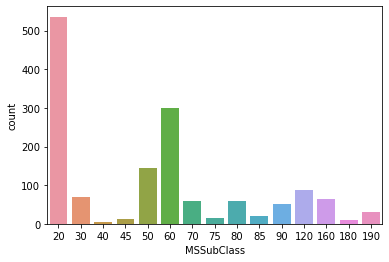

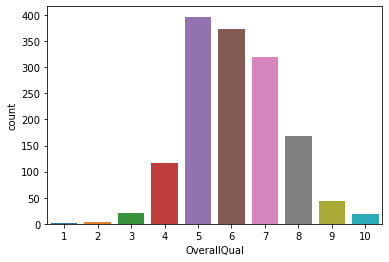

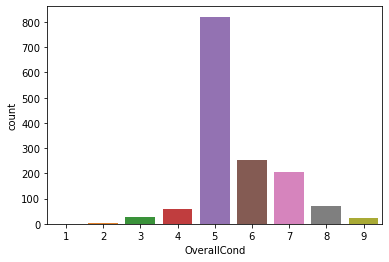

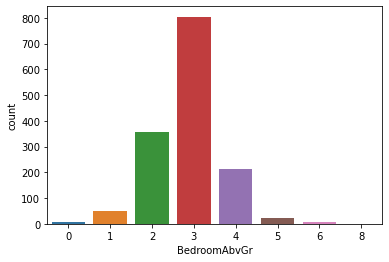

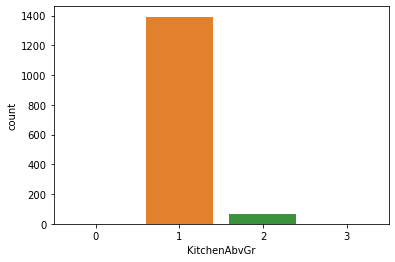

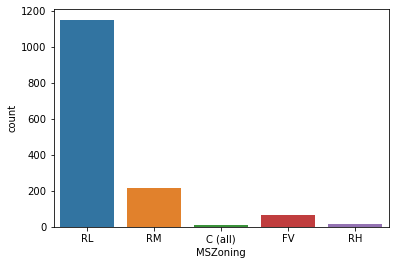

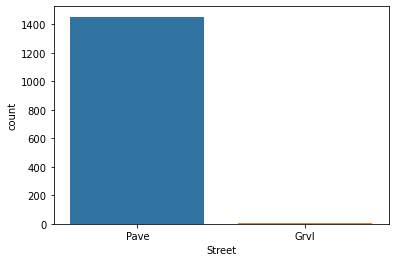

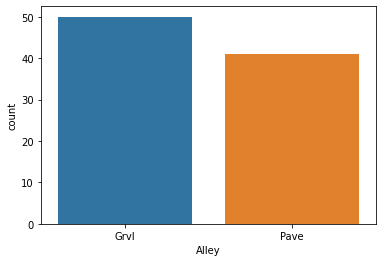

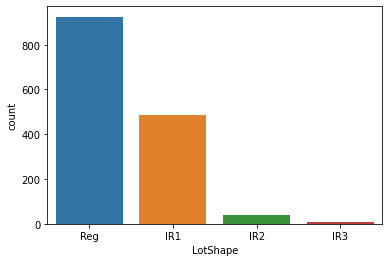

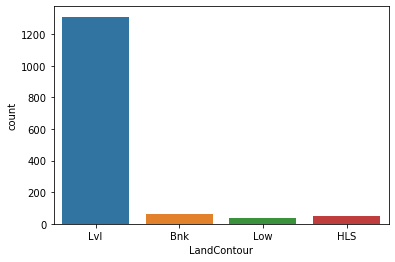

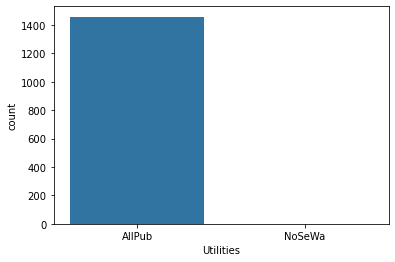

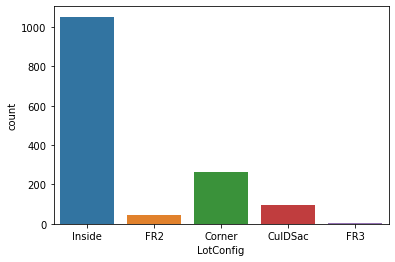

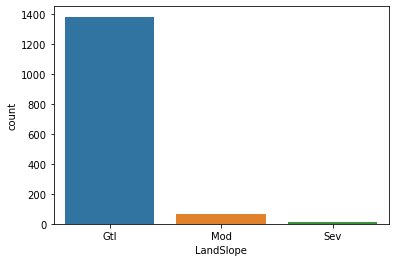

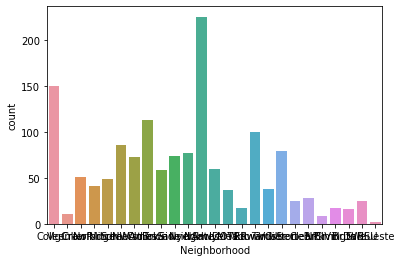

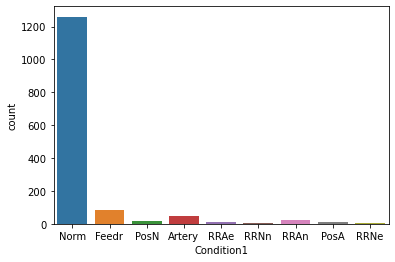

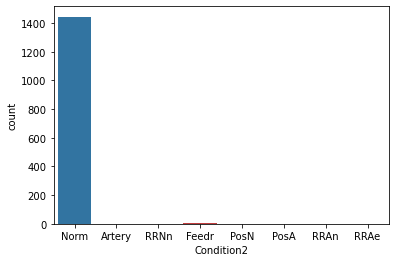

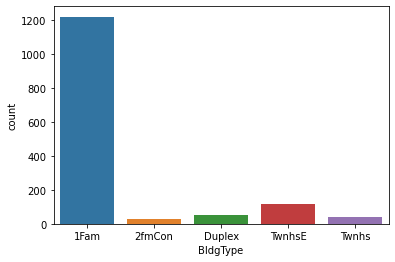

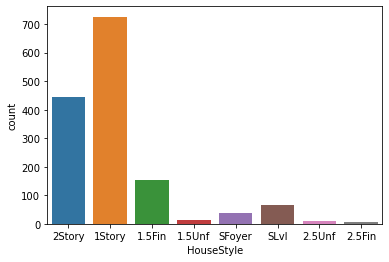

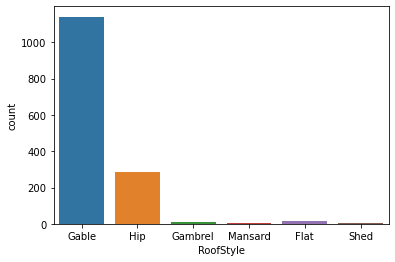

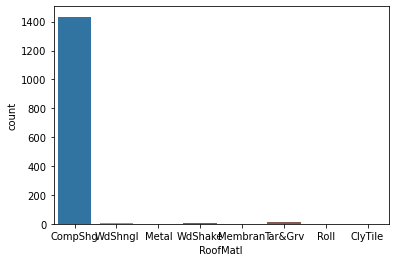

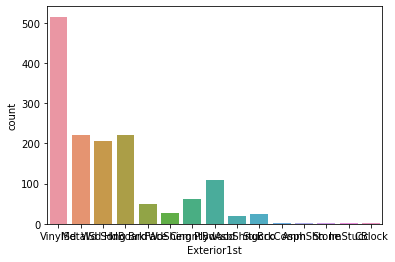

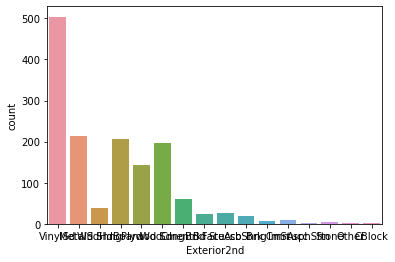

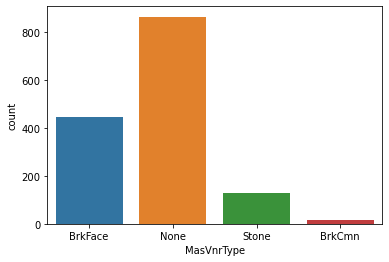

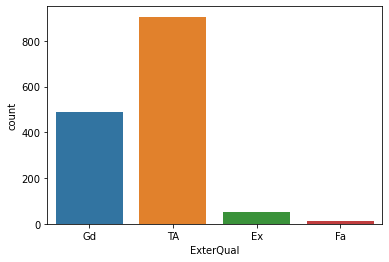

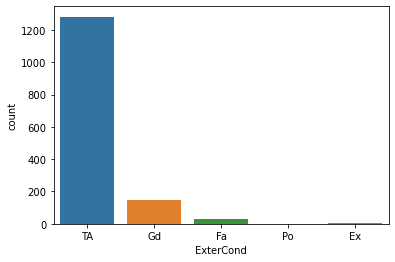

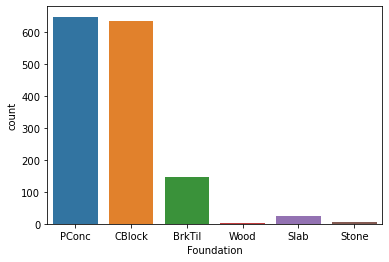

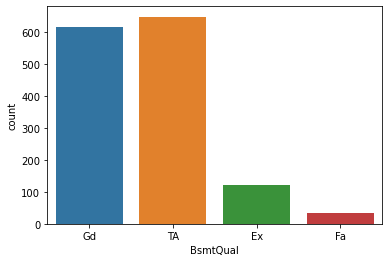

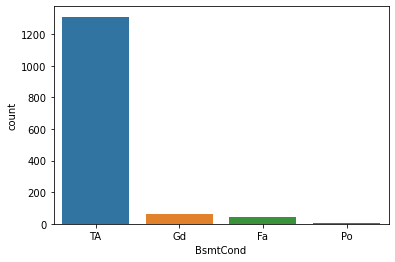

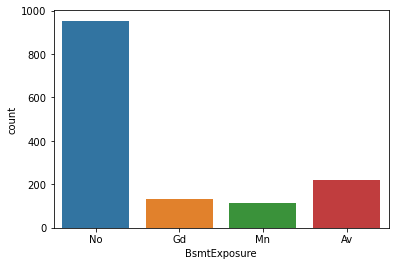

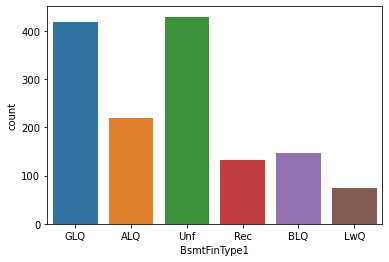

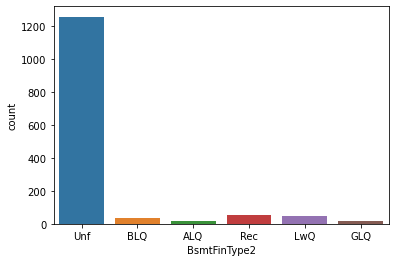

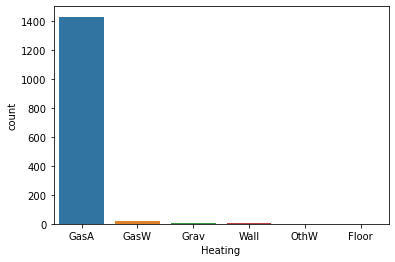

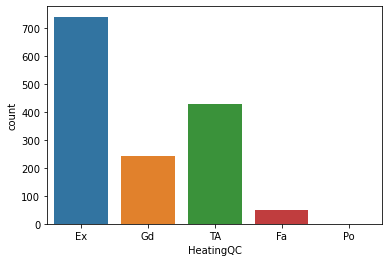

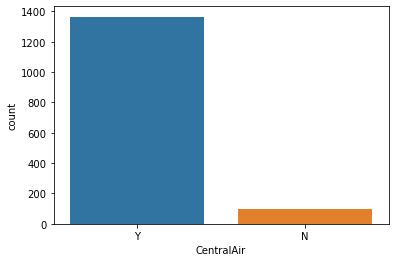

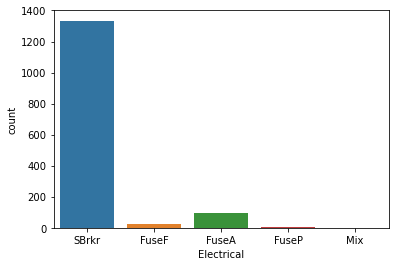

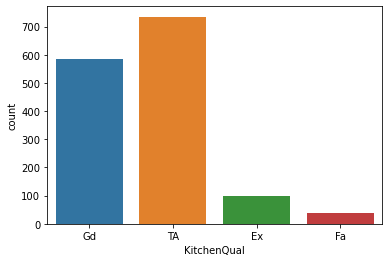

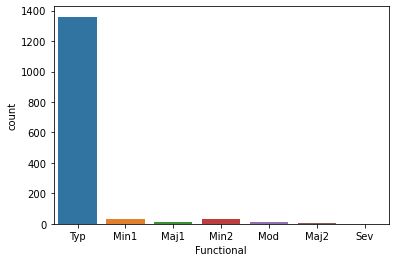

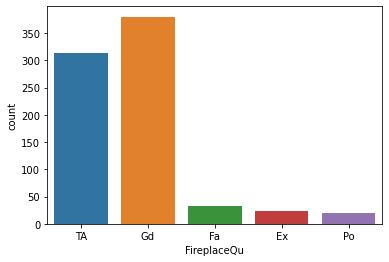

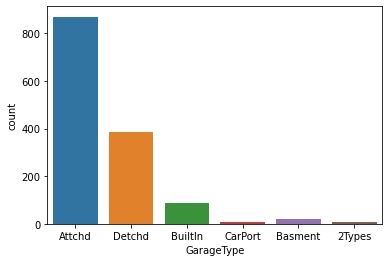

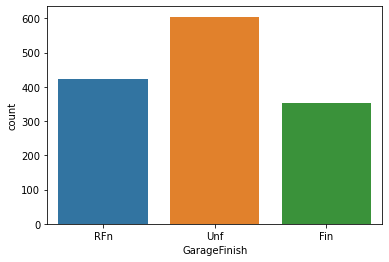

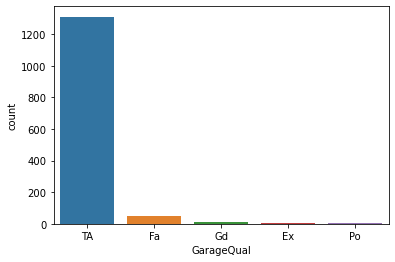

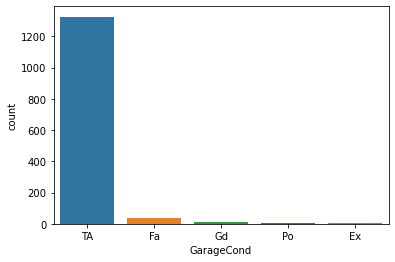

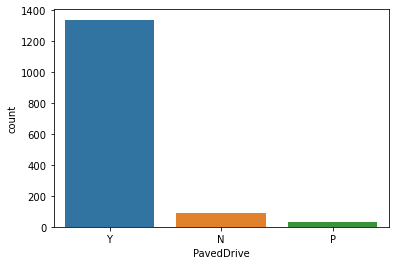

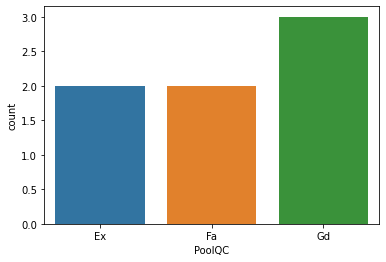

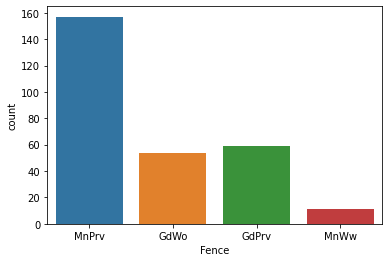

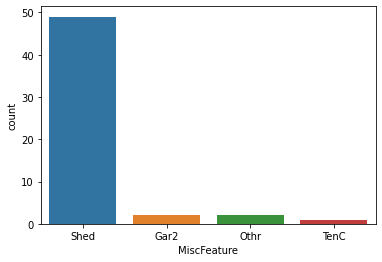

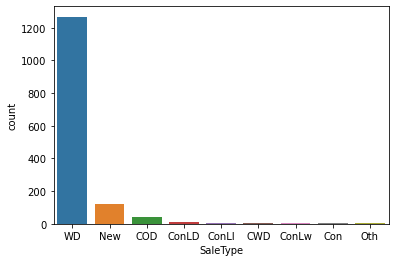

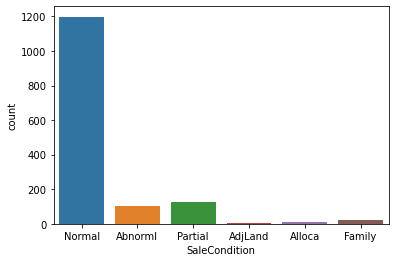

In [13]:
# Visualizing categorical variables:
for i in categorical_vars:
    #plt.figure(figsize=(10,8))
    sns.countplot(housing[i])
    plt.show()

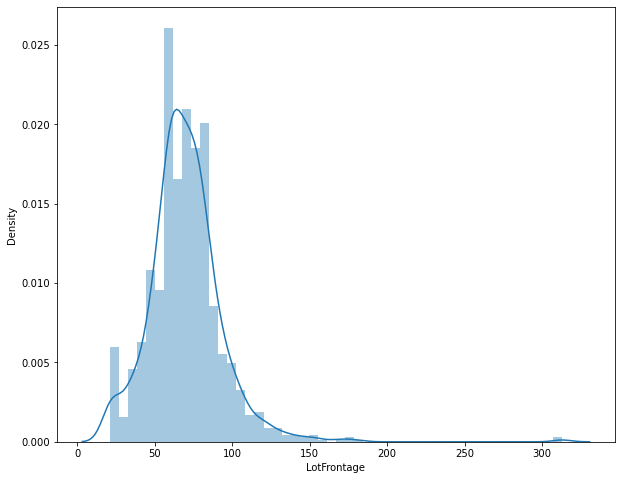

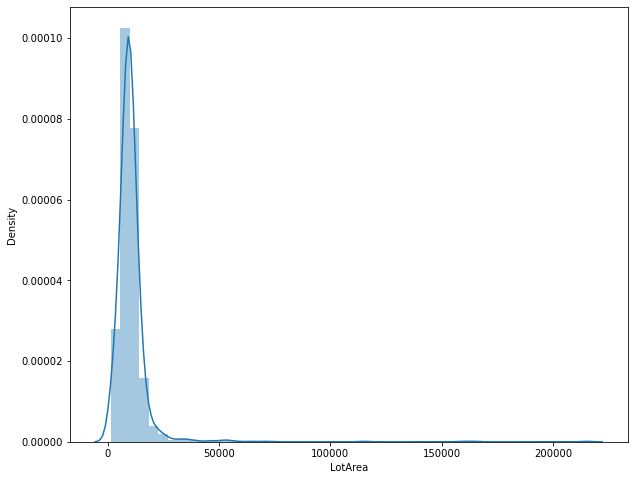

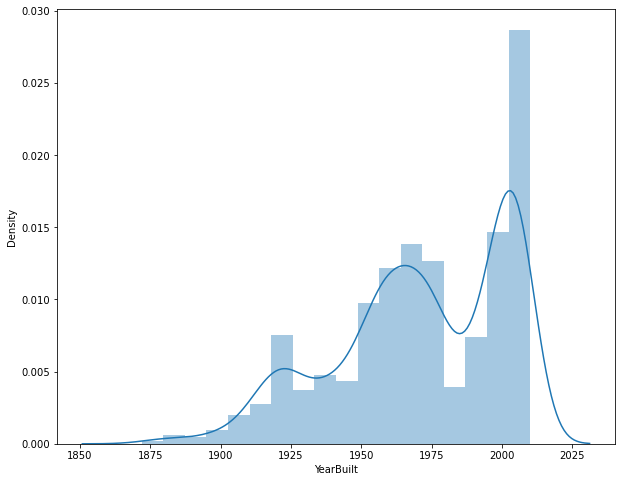

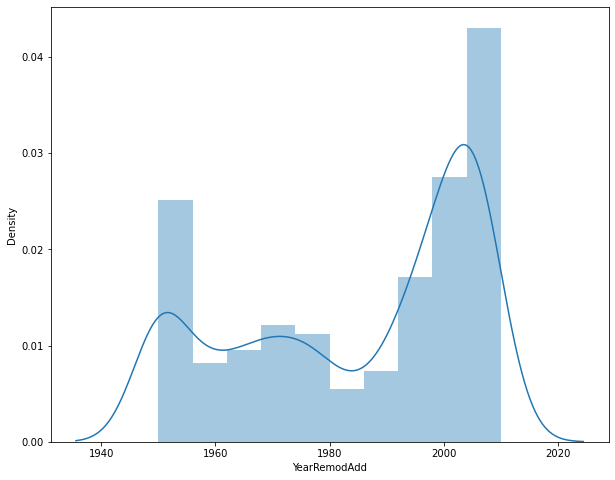

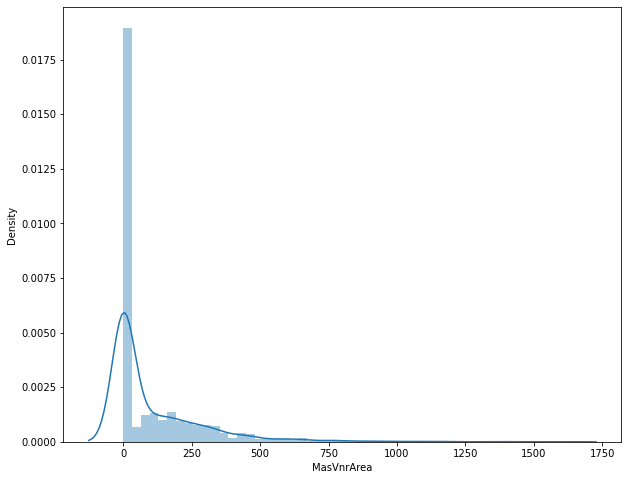

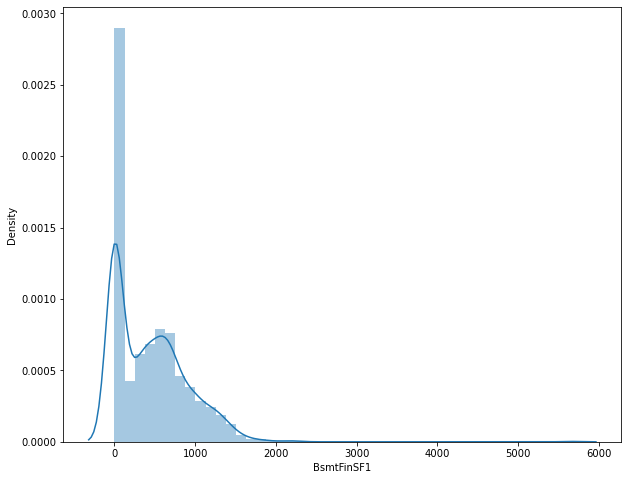

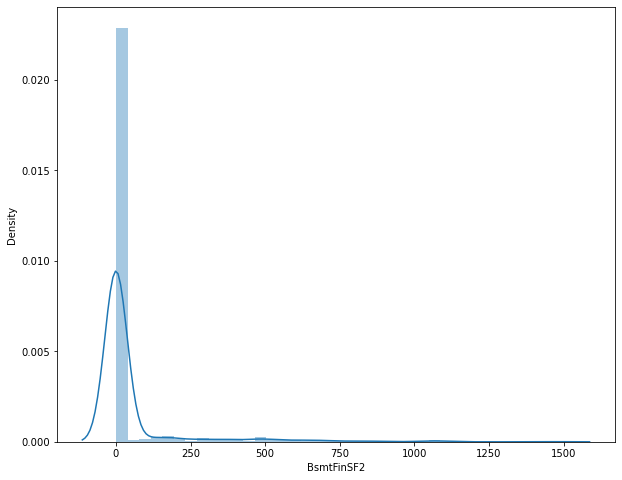

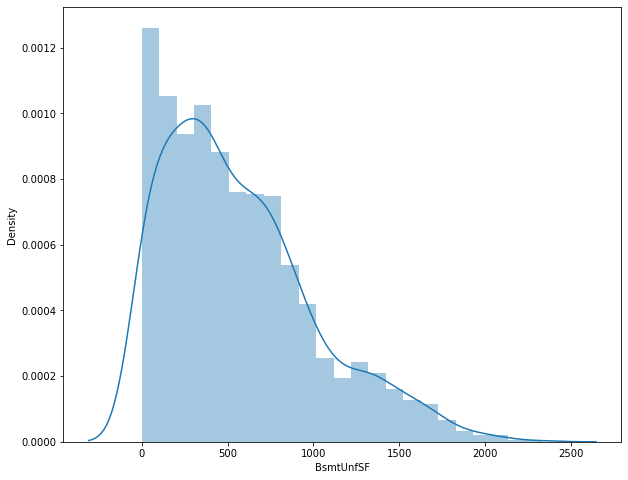

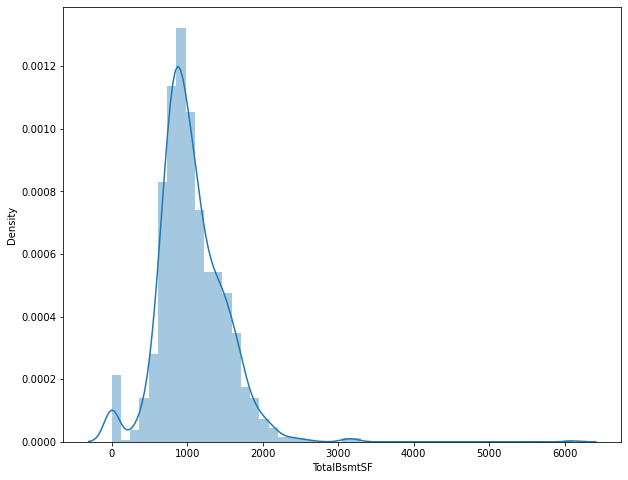

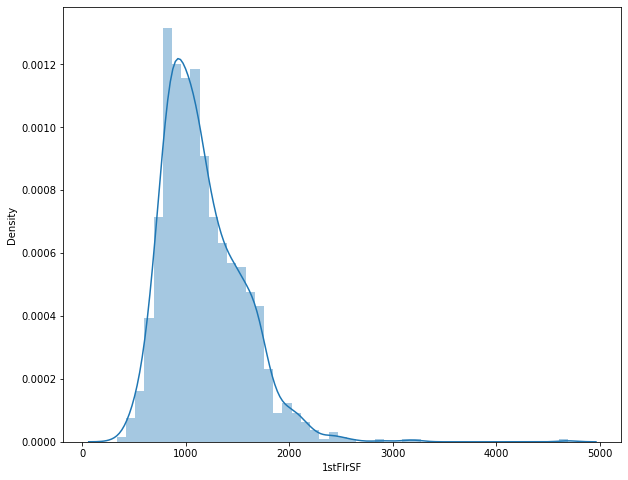

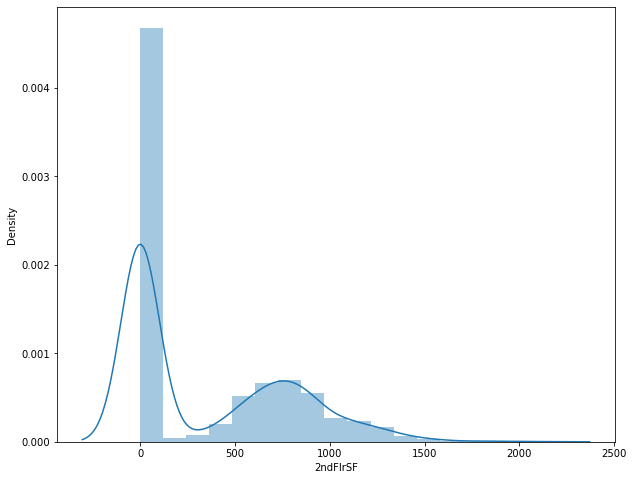

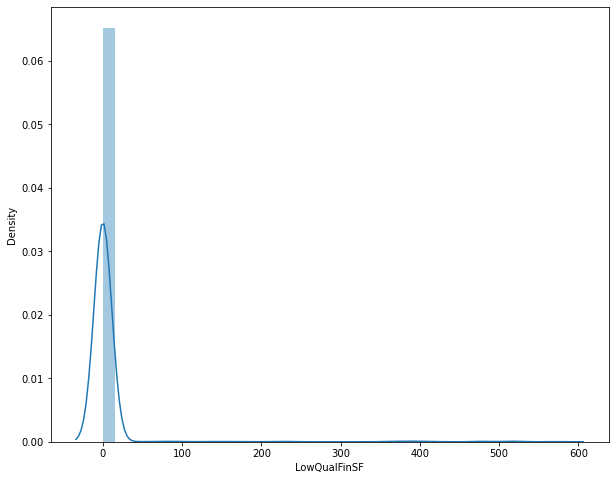

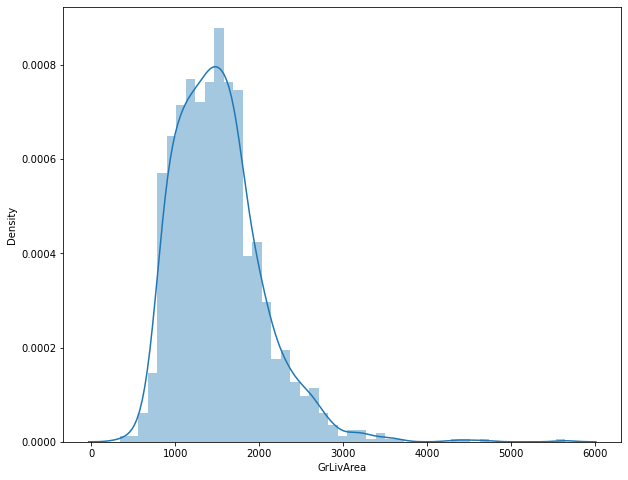

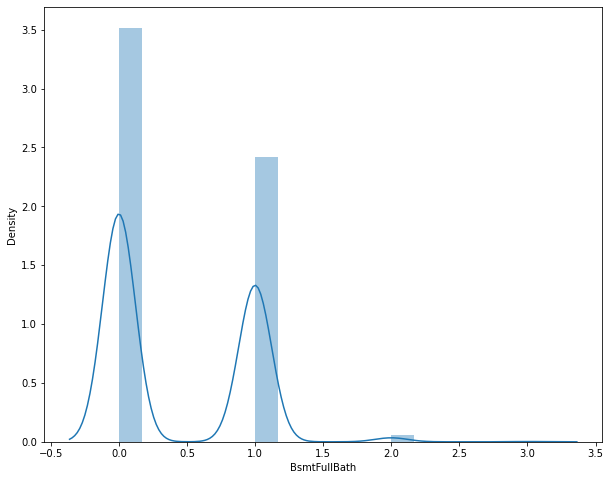

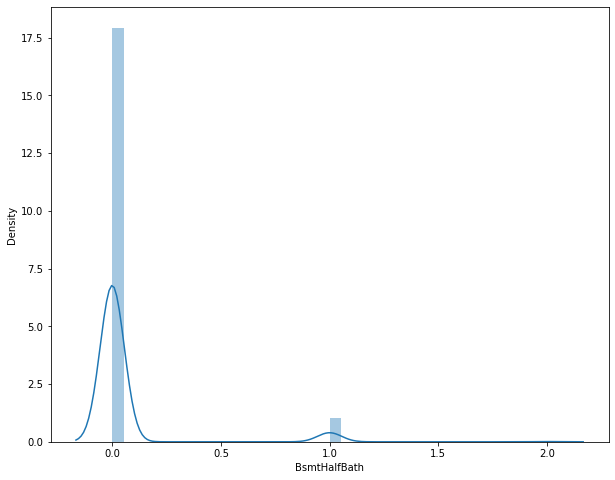

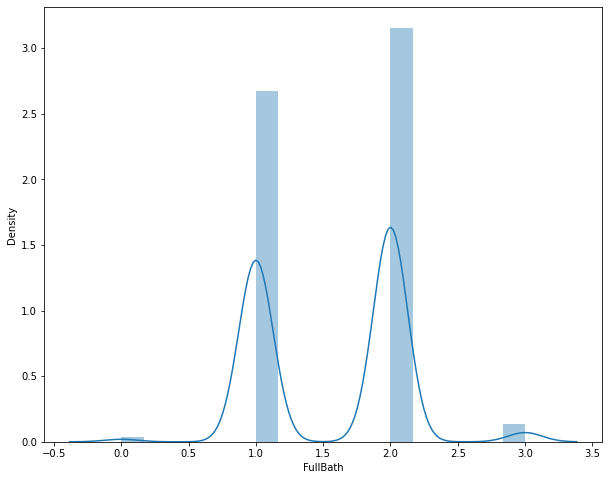

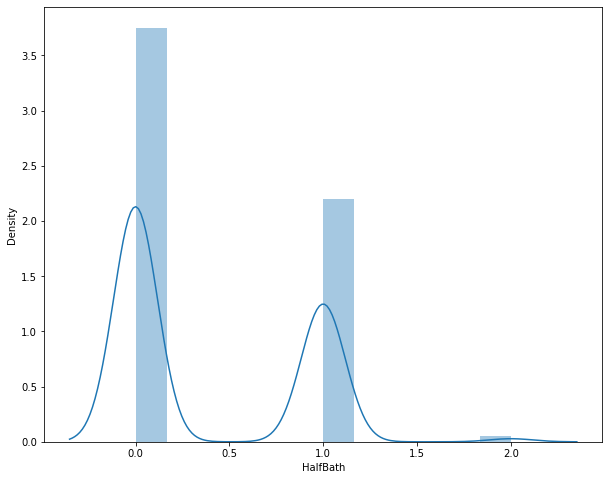

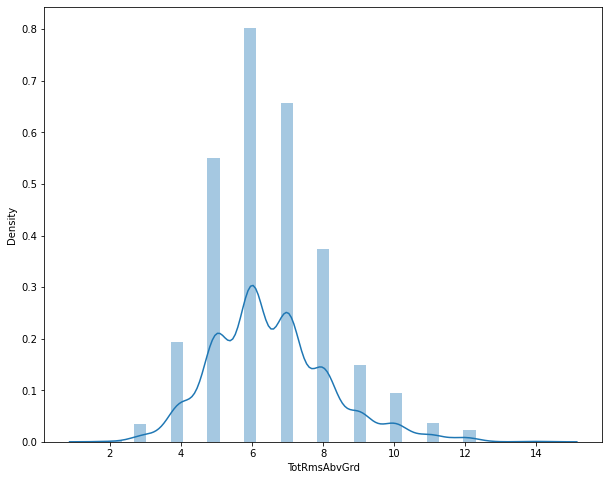

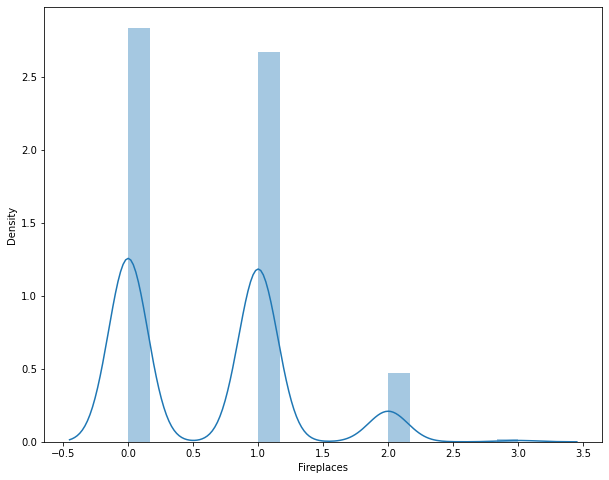

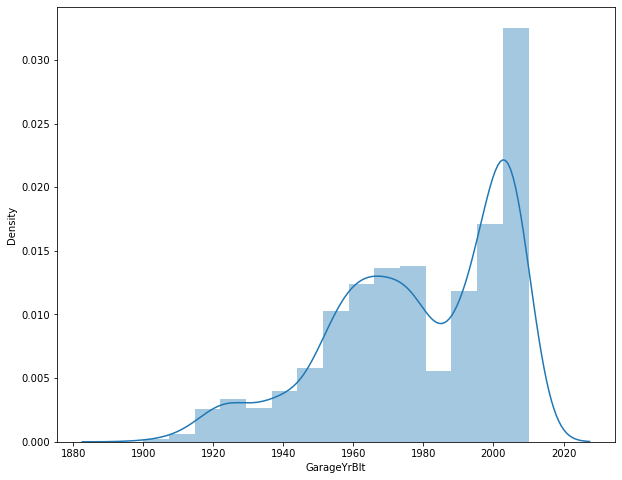

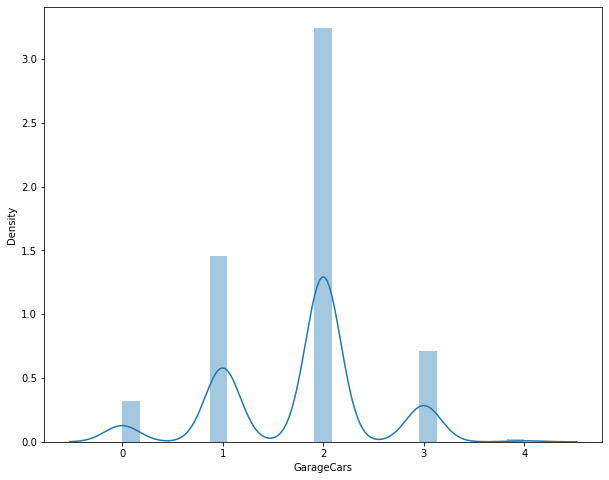

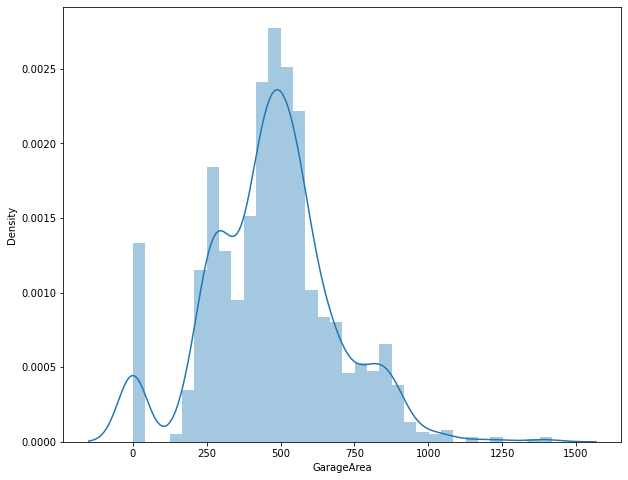

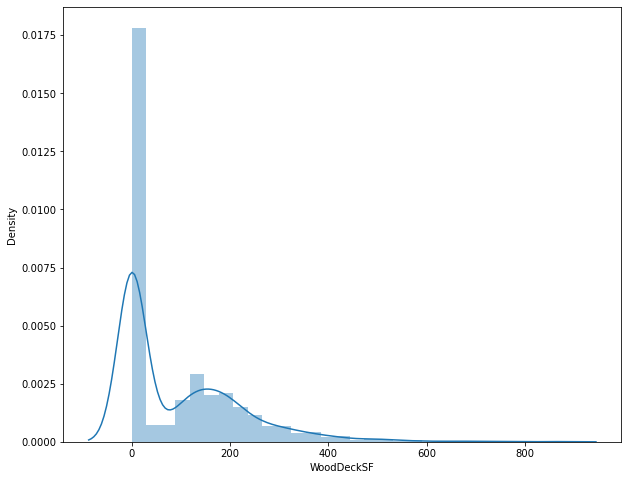

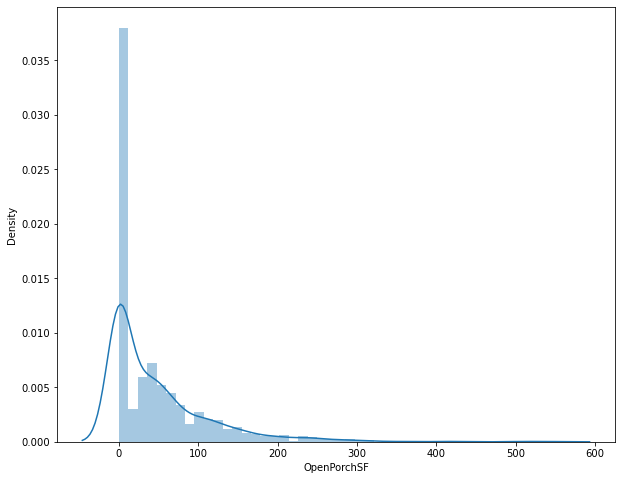

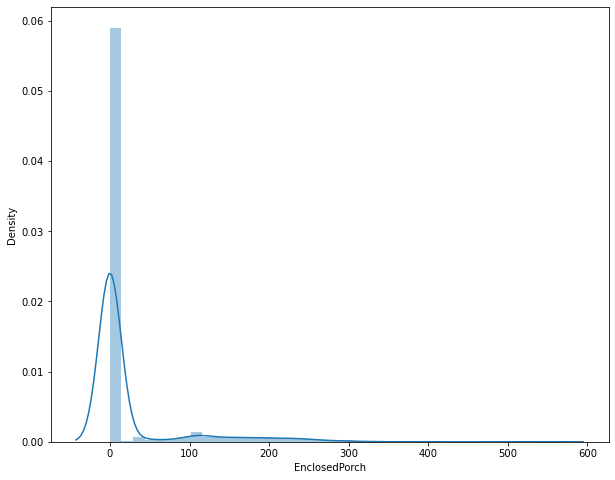

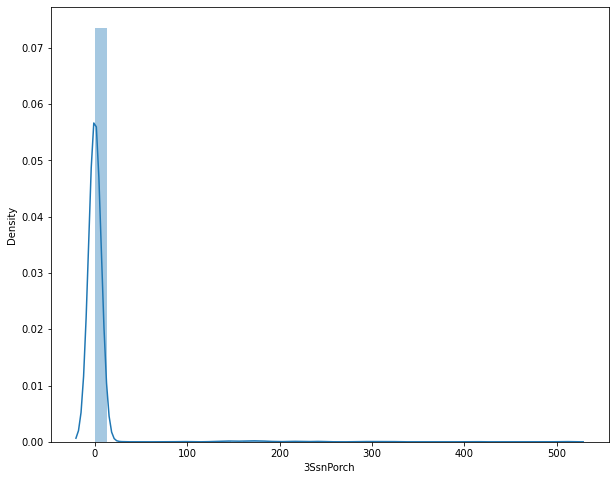

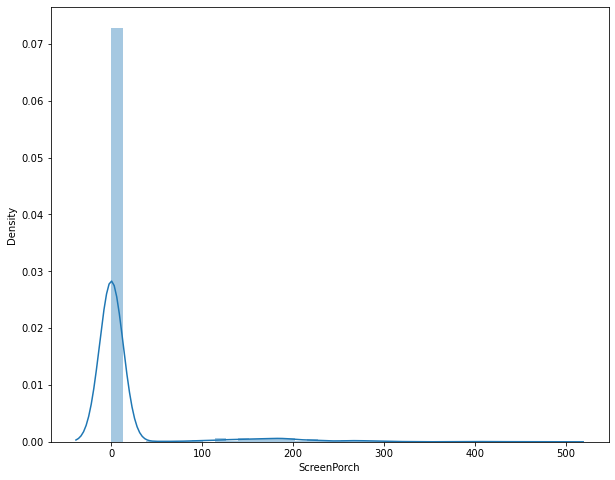

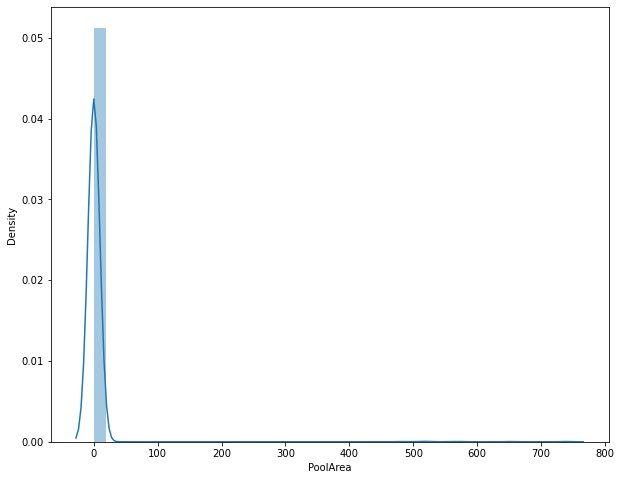

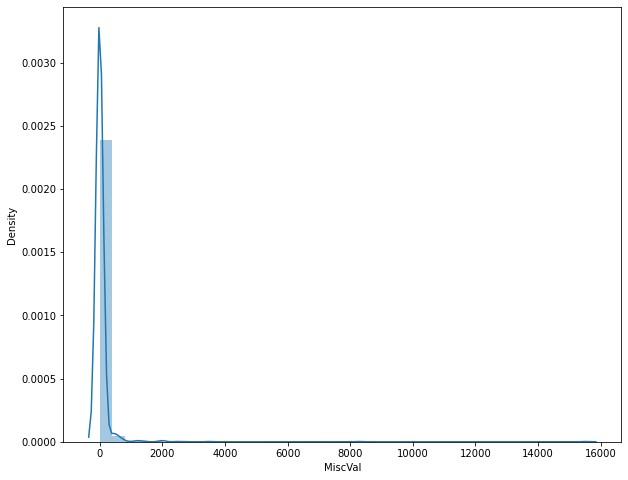

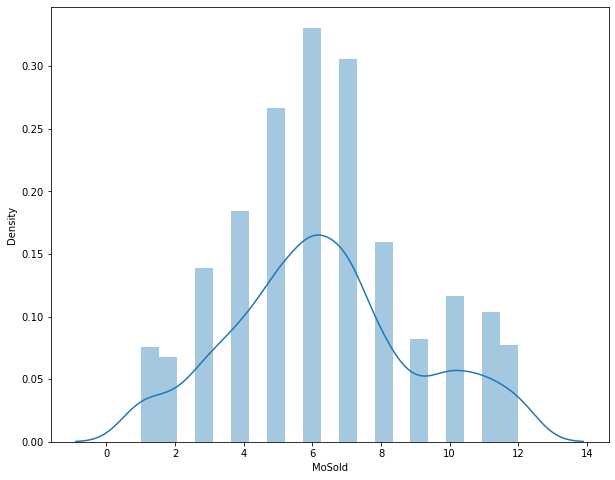

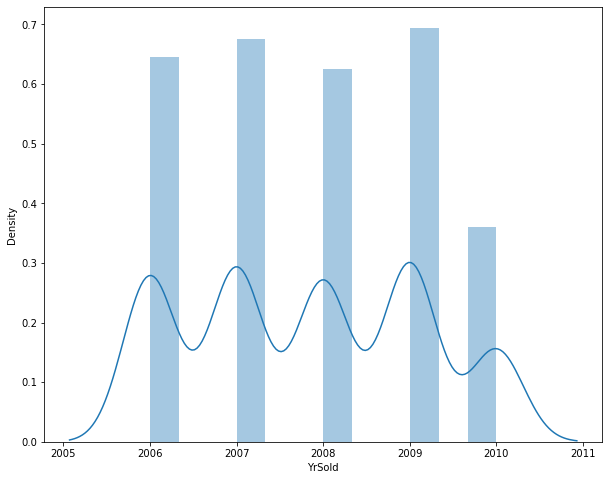

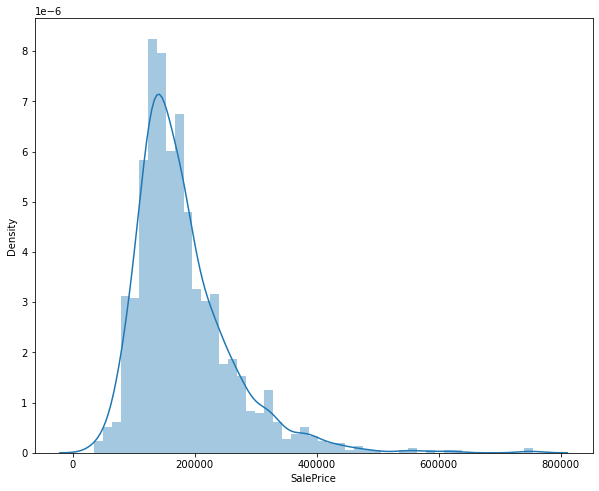

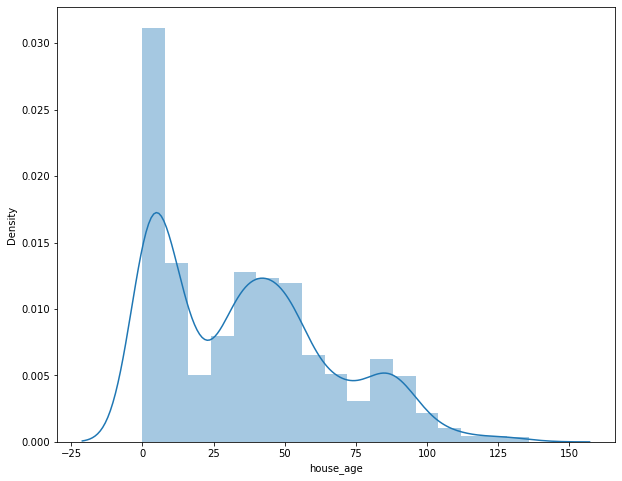

In [14]:
# Visualizing numerical variables:
for i in numerical_vars:
    plt.figure(figsize=(10,8))
    sns.distplot(housing[i])
    plt.show()

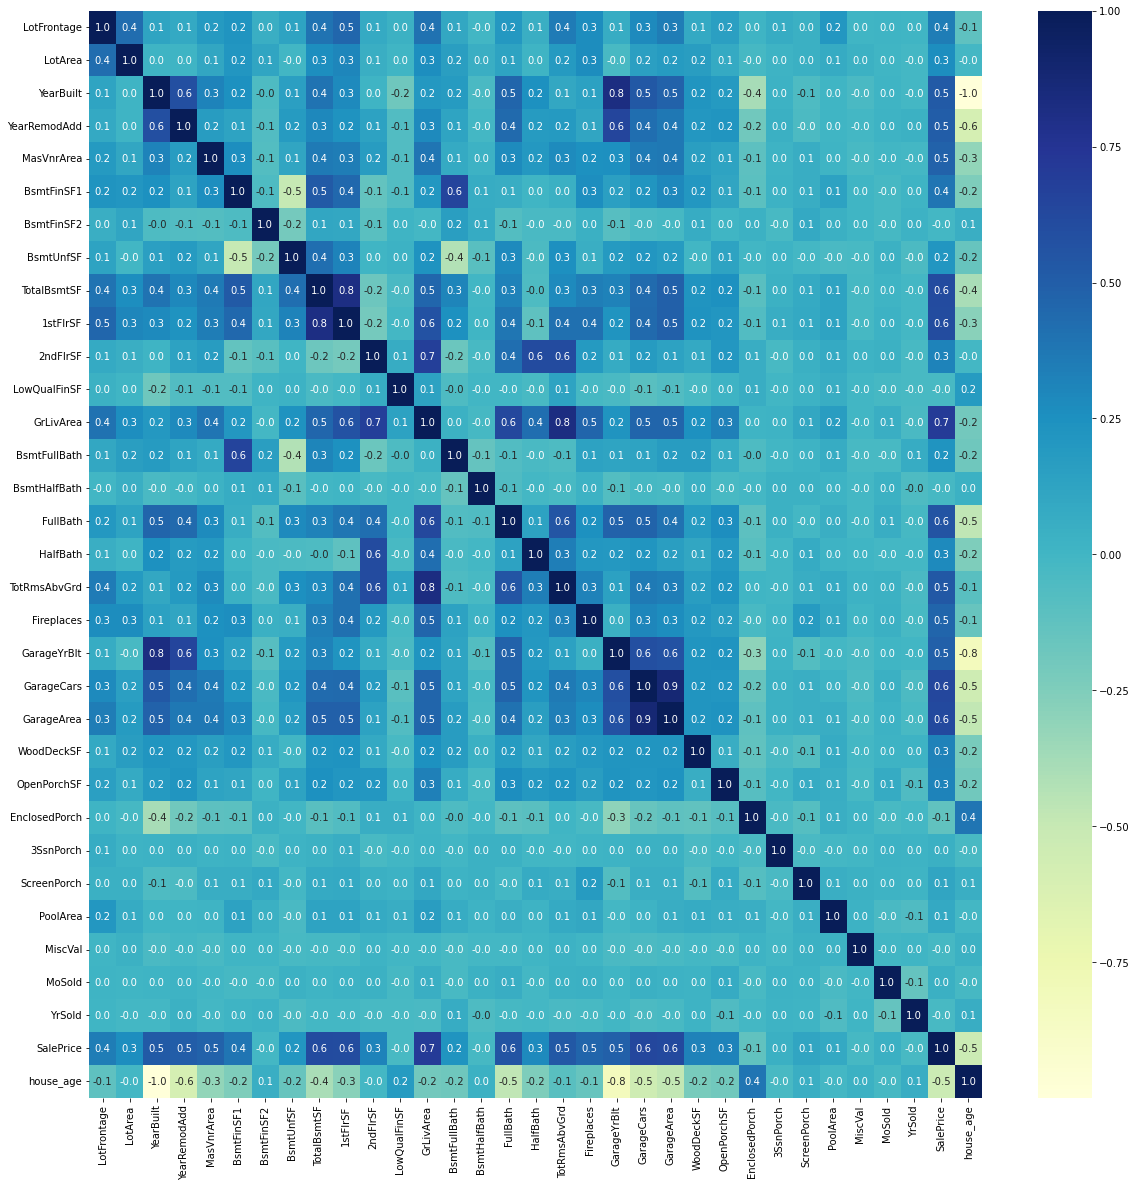

In [15]:
# Finding the Variables associated with Sales price
plt.figure(figsize=(20,20))
sns.heatmap(housing[numerical_vars].corr(),annot=True,fmt='.1f', cmap='YlGnBu')
plt.show()

In [16]:
corr = housing[numerical_vars].corr()

In [17]:
corr_sales_price = corr['SalePrice'].sort_values(ascending=False).to_dict()
corr_sales_price

{'SalePrice': 1.0,
 'GrLivArea': 0.7086244776126515,
 'GarageCars': 0.6404091972583519,
 'GarageArea': 0.6234314389183622,
 'TotalBsmtSF': 0.6135805515591943,
 '1stFlrSF': 0.6058521846919153,
 'FullBath': 0.5606637627484453,
 'TotRmsAbvGrd': 0.5337231555820284,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113866,
 'GarageYrBlt': 0.4863616774878596,
 'MasVnrArea': 0.47749304709571444,
 'Fireplaces': 0.46692883675152763,
 'BsmtFinSF1': 0.3864198062421535,
 'LotFrontage': 0.35179909657067737,
 'WoodDeckSF': 0.32441344456812926,
 '2ndFlrSF': 0.31933380283206736,
 'OpenPorchSF': 0.31585622711605504,
 'HalfBath': 0.28410767559478256,
 'LotArea': 0.2638433538714051,
 'BsmtFullBath': 0.22712223313149427,
 'BsmtUnfSF': 0.21447910554696928,
 'ScreenPorch': 0.11144657114291112,
 'PoolArea': 0.09240354949187318,
 'MoSold': 0.046432245223819446,
 '3SsnPorch': 0.04458366533574838,
 'BsmtFinSF2': -0.011378121450215146,
 'BsmtHalfBath': -0.01684415429735895,
 'MiscVal': -0.0211895796

#### Seeing the above correlation for all numerical variables, we understand that the response variable is positively correlated with GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd. SalePrce is negatively correlated with house_age, BsmtFinSF2, BsmtHalfBath,  MiscVal, LowQualFinSF, YrSold, EnclosedPorch.

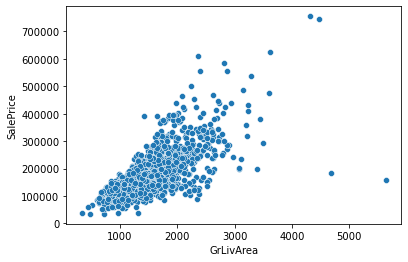

In [18]:
sns.scatterplot(data=housing, x='GrLivArea', y='SalePrice')
plt.show()

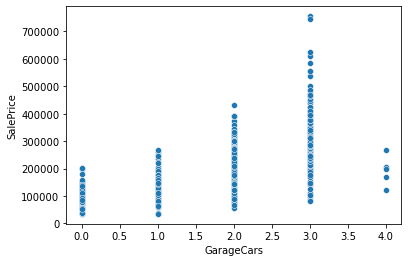

In [19]:
sns.scatterplot(data=housing, x='GarageCars', y='SalePrice')
plt.show()

This variable shows the size of Garage in car capacity, It is clear that the SalePrice is higher for the garage with 3 car capacity. 

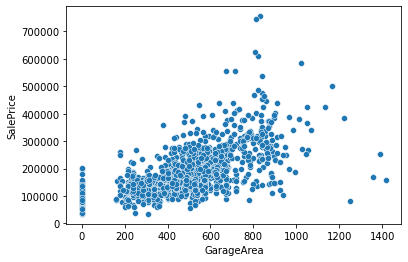

In [20]:
sns.scatterplot(data=housing, x='GarageArea', y='SalePrice')
plt.show()

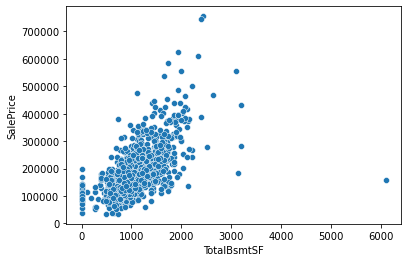

In [21]:
sns.scatterplot(data=housing, x='TotalBsmtSF', y='SalePrice')
plt.show()

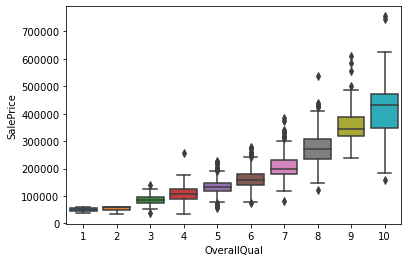

In [22]:
sns.boxplot(data=housing, x='OverallQual', y='SalePrice')
plt.show()

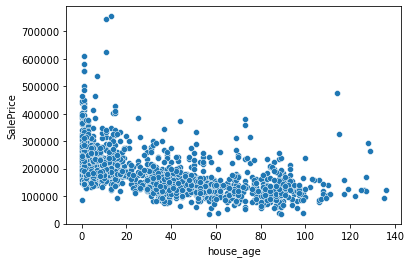

In [23]:
sns.scatterplot(data=housing, x='house_age', y='SalePrice')
plt.show()

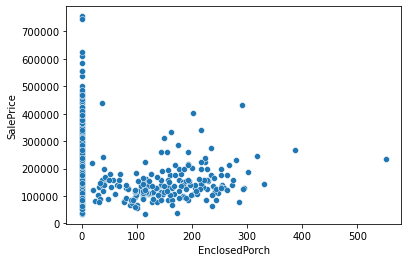

In [24]:
sns.scatterplot(data=housing, x='EnclosedPorch', y='SalePrice')
plt.show()

# Data Cleaning

## Handling Missing values

In [25]:
# Finding the percentage of missing values in each column
with pd.option_context('display.max_rows',None):
    print(((housing.isnull().sum()/len(housing))*100).sort_values(ascending=False))

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageQual        5.547945
GarageFinish      5.547945
GarageCond        5.547945
GarageType        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtCond          2.534247
BsmtQual          2.534247
BsmtFinType1      2.534247
MasVnrType        0.547945
MasVnrArea        0.547945
Electrical        0.068493
MSSubClass        0.000000
Fireplaces        0.000000
TotRmsAbvGrd      0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
Functional        0.000000
GarageArea        0.000000
GarageCars        0.000000
BsmtFullBath      0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
P


### Handling missing values In Categorical Variables
- Deleting the columns with more than 80% missing values.

In [26]:
housing.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [27]:
categorical_vars=categorical_vars.drop(['PoolQC','MiscFeature','Alley','Fence'])
categorical_vars

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BedroomAbvGr',
       'KitchenAbvGr', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [28]:
housing.shape

(1460, 77)

In [ ]:
# Finding the percentage of missing values in each column
with pd.option_context('display.max_rows',None):
    print(((housing.isnull().sum()/len(housing))*100).sort_values(ascending=False))

Obsering the columns which still has missing values :FireplaceQu,LotFrontage,,GarageYrBlt,GarageType,GarageFinish,GarageQual,
GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtQual,BsmtCond,MasVnrType,MasVnrArea,Electrical

In [29]:
# FireplaceQC has ~47% missing values, if I impute it with the mode of the values then 'Gd' as the category 
# will dominate rest of the values. 
print(housing['FireplaceQu'].value_counts())

# Hence, we can delete this column as well. 
housing.drop(['FireplaceQu'],axis=1,inplace=True)


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


Similary, GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtCond,MasVnrType, Electrical  have the one value dominating, so we will remove these columns as well.

In [30]:
housing.drop(columns=['GarageType','GarageFinish','GarageYrBlt','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtCond',
                      'MasVnrType', 'Electrical'],axis=1, inplace=True)

In [31]:
categorical_vars=categorical_vars.drop(['GarageType','GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtCond',
                      'MasVnrType', 'Electrical','FireplaceQu'])
categorical_vars

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BedroomAbvGr',
       'KitchenAbvGr', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
numerical_vars=numerical_vars.drop(['GarageYrBlt'])

In [ ]:
# Finding the percentage of missing values in each column
with pd.option_context('display.max_rows',None):
    print(((housing.isnull().sum()/len(housing))*100).sort_values(ascending=False))

In [33]:
### BsmtFinType1 has NaN for No Basement category. Imputing the missing values with No_BsmtFintype1.
housing.BsmtFinType1.fillna(value="No_BsmtFintype1",inplace=True)

In [34]:
### BsmtQual has NaN for No Basement category. Imputing the missing values with No_Bsmtqlty.
housing.BsmtQual.fillna(value="No_Bsmtqlty",inplace=True)

### Handling missing values in Continuous Variables

In [35]:
housing.MasVnrArea.mean()

103.68526170798899

In [36]:
housing.MasVnrArea.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.1      0.0
0.2      0.0
0.3      0.0
0.4      0.0
0.5      0.0
0.6     16.0
0.7    117.0
0.8    206.0
0.9    335.0
Name: MasVnrArea, dtype: float64

In [37]:
## Missing values in MasVnrArea is in the quantile range from 0.6 to 0.9. So it is better to fill 
## these few missing values with mean.
housing['MasVnrArea'].fillna(value=housing.MasVnrArea.mean(),inplace=True)

In [38]:
housing.LotFrontage.quantile([0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.01    21.0
0.20    53.0
0.30    60.0
0.40    63.0
0.50    69.0
0.60    74.0
0.70    79.0
0.80    85.0
0.90    96.0
Name: LotFrontage, dtype: float64

There are so many outliers in this column so it is better to impute the missing values with the mean. 

In [39]:
housing['LotFrontage'].fillna(value=housing.LotFrontage.mean(),inplace=True)

In [40]:
# Finding the percentage of missing values in each column
with pd.option_context('display.max_rows',None):
    print(((housing.isnull().sum()/len(housing))*100).sort_values(ascending=False))

MSSubClass       0.0
Fireplaces       0.0
CentralAir       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
GarageCars       0.0
MSZoning         0.0
GarageArea       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
BsmtUnfSF        0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType     

# Data Preparation

In [41]:
housing.shape

(1460, 66)

In [ ]:
# Drop year column from caategorical vars list


In [42]:
# Convert int categorical columns to object type
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['BedroomAbvGr'] = housing['OverallQual'].astype('object')
housing['KitchenAbvGr'] = housing['OverallQual'].astype('object')

In [43]:
#create dummy variables
temp_dummy = pd.get_dummies(housing[categorical_vars], drop_first=True)

In [44]:
temp_dummy.shape

(1460, 214)

In [45]:
housing = housing.drop(categorical_vars,axis=1)

In [46]:
housing = pd.concat([housing,temp_dummy],axis=1)

In [47]:
housing.shape

(1460, 246)

### Rescaling the features
- Applying minMax on numerical variables


In [ ]:
numerical_vars

In [48]:
## Nomralization:
scaler = MinMaxScaler()

housing[numerical_vars] =scaler.fit_transform(housing[numerical_vars])
housing[numerical_vars].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,house_age
0,0.150685,0.033420,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,...,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078,0.036765
1,0.202055,0.038795,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583,0.227941
2,0.160959,0.046507,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,...,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908,0.051471
3,0.133562,0.038561,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,...,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952,0.669118
4,0.215753,0.060576,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,...,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709,0.058824


In [49]:
housing[numerical_vars].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,house_age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.167979,0.043080,0.719332,0.581096,0.064803,0.078604,0.031580,0.242826,0.173065,0.190139,...,0.085302,0.039772,0.006712,0.031377,0.003738,0.002806,0.483811,0.453938,0.202779,0.268735
std,0.075425,0.046653,0.218862,0.344090,0.112856,0.080811,0.109443,0.189155,0.071801,0.088708,...,0.121126,0.110723,0.057711,0.116161,0.054441,0.032008,0.245784,0.332024,0.110321,0.222428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.029229,0.594203,0.283333,0.000000,0.000000,0.000000,0.095462,0.130237,0.125746,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000,0.132030,0.058824
50%,0.167979,0.038227,0.731884,0.733333,0.000000,0.067948,0.000000,0.204409,0.162275,0.172786,...,0.045704,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000,0.177892,0.257353
75%,0.198630,0.048150,0.927536,0.900000,0.102656,0.126196,0.000000,0.345890,0.212480,0.242600,...,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000,0.248715,0.397059
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Handling the skewness in 'SalePrice' column

In [50]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson',standardize=True)
housing['SalePrice'] = power.fit_transform(np.array(housing['SalePrice']).reshape(-1, 1))

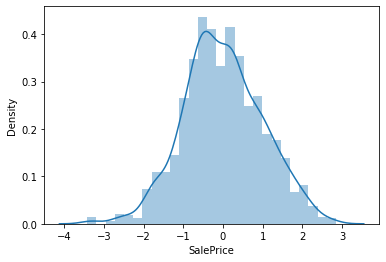

In [51]:
sns.distplot(housing['SalePrice'])
plt.show()

In [52]:
y = housing.pop('SalePrice')
X = housing

In [53]:
housing.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=245)

### Building Our Initial Model using RFE
Since, there are ~300 features, it will be difficult to choose only few from them. Hence Let's pick top 50 features out of 305 features using automatic feature selection.

In [ ]:
### Use this line of code for subjective question3
#X.drop(columns=['GrLivArea' , '1stFlrSF' , 'OverallQual_9', 'YearBuilt', 'OverallQual_10'],inplace=True)

In [54]:
lm = LinearRegression()

lm.fit(X,y)

rfe = RFE(lm,40)
rfe = rfe.fit(X,y)


In [55]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 45),
 ('LotArea', False, 12),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 37),
 ('MasVnrArea', False, 126),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 63),
 ('BsmtHalfBath', False, 175),
 ('FullBath', False, 66),
 ('HalfBath', False, 69),
 ('TotRmsAbvGrd', False, 150),
 ('Fireplaces', False, 42),
 ('GarageCars', False, 40),
 ('GarageArea', False, 16),
 ('WoodDeckSF', False, 46),
 ('OpenPorchSF', False, 86),
 ('EnclosedPorch', False, 54),
 ('3SsnPorch', False, 71),
 ('ScreenPorch', False, 39),
 ('PoolArea', False, 127),
 ('MiscVal', False, 160),
 ('MoSold', False, 190),
 ('YrSold', True, 1),
 ('house_age', True, 1),
 ('MSSubClass_30', False, 65),
 ('MSSubClass_40', False, 124),
 ('MSSubClass_45', False, 32),
 ('MSSubClass_50', False, 191),
 ('MSSubClass_60', False, 177),
 (

In [57]:
col = X.columns[rfe.support_]
col

Index(['YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'YrSold',
       'house_age', 'MSSubClass_90', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'BedroomAbvGr_2',
       'BedroomAbvGr_3', 'BedroomAbvGr_4', 'BedroomAbvGr_5', 'BedroomAbvGr_7',
       'BedroomAbvGr_8', 'BedroomAbvGr_9', 'BedroomAbvGr_10', 'KitchenAbvGr_2',
       'KitchenAbvGr_3', 'KitchenAbvGr_4', 'KitchenAbvGr_5', 'KitchenAbvGr_6',
       'KitchenAbvGr_7', 'KitchenAbvGr_8', 'KitchenAbvGr_9', 'BldgType_Duplex',
       'BsmtQual_No_Bsmtqlty', 'BsmtFinType1_No_BsmtFintype1'],
      dtype='object')

In [58]:
# Creating X_test dataframe with RFE selected variables
X_rfe = X[col]

X_rfe = sm.add_constant(X_rfe)

lm = sm.OLS(y,X_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     348.2
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:53:43   Log-Likelihood:                -814.72
No. Observations:                1460   AIC:                             1669.
Df Residuals:                    1440   BIC:                             1775.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Ridge Regression

In [59]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5

ridge_model_cv = GridSearchCV(estimator=ridge,
                              param_grid=params,
                             cv=folds,
                             return_train_score=True,
                             verbose=1)

ridge_model_cv.fit(X_rfe,y)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, verbose=1)

In [60]:
#Printing the best hyper parameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 2.0}


In [61]:
#Fitting Ridge model for alpha = 2.0 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_rfe, y)
print(ridge.coef_)

[ 0.          0.53749355  0.7714564   0.23439669 -0.15191572  0.71108437
  1.97841922  0.6105192  -0.06135083  1.85523369 -0.01810624 -0.54593041
 -0.13101974 -0.34229924 -0.14542597 -0.05674623  0.05531528  0.1972175
  0.24294766  0.35782506  0.47896665  0.43690023 -0.34229924 -0.14542597
 -0.05674623  0.05531528  0.24294766  0.35782506  0.47896665  0.43690023
 -0.34229924 -0.14542597 -0.05674623  0.05531528  0.1972175   0.24294766
  0.35782506  0.47896665 -0.13101974 -0.12728782 -0.12728782]


In [62]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred = ridge.predict(X_rfe)


metric_ridge = []
r2_train_lr = r2_score(y, y_pred)
print(r2_train_lr)
metric_ridge.append(r2_train_lr)


rss1_lr = np.sum(np.square(y - y_pred))
print(rss1_lr)
metric_ridge.append(rss1_lr)


mse_train_lr = mean_squared_error(y, y_pred)
print(mse_train_lr)
metric_ridge.append(mse_train_lr**0.5)


0.8174599914357357
266.508412503826
0.18254000856426436


In [63]:
#Fitting Ridge model by doubling the value of alpha and printing coefficients which have been penalised
alpha1 = 2*alpha
ridge_double = Ridge(alpha=alpha1)

ridge_double.fit(X_rfe, y)
print(ridge_double.coef_)

[ 0.          0.52970552  0.79540898  0.25381609 -0.10339797  0.75644444
  1.71015452  0.62170451 -0.03483245  1.64219085 -0.01921681 -0.53806051
 -0.11639244 -0.34429756 -0.20634297 -0.12394297 -0.00864282  0.10660331
  0.1868483   0.3085074   0.4312784   0.38206046 -0.34429756 -0.20634297
 -0.12394297 -0.00864282  0.1868483   0.3085074   0.4312784   0.38206046
 -0.34429756 -0.20634297 -0.12394297 -0.00864282  0.10660331  0.1868483
  0.3085074   0.4312784  -0.11639244 -0.11899869 -0.11899869]


In [64]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred = ridge_double.predict(X_rfe)


metric_ridge_double = []
r2_train_lr = r2_score(y, y_pred)
print(r2_train_lr)
metric_ridge_double.append(r2_train_lr)


rss1_lr = np.sum(np.square(y - y_pred))
print(rss1_lr)
metric_ridge_double.append(rss1_lr)


mse_train_lr = mean_squared_error(y, y_pred)
print(mse_train_lr)
metric_ridge_double.append(mse_train_lr**0.5)

0.8134913508047121
272.3026278251203
0.18650864919528787


# Lasso

In [65]:
lasso = Lasso()
# fold and param_grid is same as  in Ridge regression
# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_rfe, y) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [67]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_rfe, y) 

Lasso(alpha=0.0001)

In [68]:
lasso.coef_

array([ 0.        ,  1.04762201,  0.76592623,  0.20973024, -0.18391168,
        0.        ,  2.91489054,  0.68401181, -0.06516605,  1.83882731,
       -0.02863745, -0.08041078, -0.29805908, -0.53574067,  0.06645928,
        0.10418268,  0.19211986,  0.26013387,  0.56789422,  0.95520967,
        1.33708401,  1.17209766, -0.        ,  0.07924514,  0.17972324,
        0.42208009,  0.37487271,  0.3037501 ,  0.28863823,  0.26547831,
       -0.        ,  0.04800659,  0.19387053,  0.18661085,  0.75626348,
        0.39316059,  0.40148195,  0.39444941, -0.        , -0.36171063,
       -0.        ])

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred = lasso.predict(X_rfe)


metric_lasso = []
r2_train_lr = r2_score(y, y_pred)
print(r2_train_lr)
metric_lasso.append(r2_train_lr)


rss1_lr = np.sum(np.square(y - y_pred))
print(rss1_lr)
metric_lasso.append(rss1_lr)


mse_train_lr = mean_squared_error(y, y_pred)
print(mse_train_lr)
metric_lasso.append(mse_train_lr**0.5)

0.8208848455267462
261.50812553095057
0.17911515447325382


In [70]:
alpha2 =2*0.0001

lasso_double = Lasso(alpha=alpha2)
        
lasso_double.fit(X_rfe, y) 

Lasso(alpha=0.0002)

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred = lasso_double.predict(X_rfe)


metric_lasso_double = []
r2_train_lr = r2_score(y, y_pred)
print(r2_train_lr)
metric_lasso_double.append(r2_train_lr)


rss1_lr = np.sum(np.square(y - y_pred))
print(rss1_lr)
metric_lasso_double.append(rss1_lr)


mse_train_lr = mean_squared_error(y, y_pred)
print(mse_train_lr)
metric_lasso_double.append(mse_train_lr**0.5)

0.8204728951558538
262.1095730724536
0.1795271048441463


In [72]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','RSS (Train)','MSE (Train)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression (alpha=2)')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression (alpha=0.0001)')
rg_metric_dbl = pd.Series(metric_ridge_double, name = 'Ridge Regression (alpha=4)')
ls_metric_dbl = pd.Series(metric_lasso_double, name = 'Lasso Regression (alpha=0.0002)')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_metric_dbl, ls_metric_dbl], axis = 1)

final_metric

,Metric,Ridge Regression (alpha=2),Lasso Regression (alpha=0.0001),Ridge Regression (alpha=4),Lasso Regression (alpha=0.0002)
0,R2 Score (Train),0.817460,0.820885,0.813491,0.820473
1,RSS (Train),266.508413,261.508126,272.302628,262.109573
2,MSE (Train),0.427247,0.423220,0.431866,0.423706


In [73]:
betas = pd.DataFrame(index=X_rfe.columns)

In [74]:
betas.rows = X_rfe.columns

In [75]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [76]:
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Ridge'],ascending=False)

,Ridge,Lasso
1stFlrSF,1.978419,2.914891
GrLivArea,1.855234,1.838827
BsmtFinSF1,0.771456,0.765926
TotalBsmtSF,0.711084,0.000000
2ndFlrSF,0.610519,0.684012
YearBuilt,0.537494,1.047622
BedroomAbvGr_9,0.478967,0.288638
OverallQual_9,0.478967,1.337084
KitchenAbvGr_9,0.478967,0.394449
BedroomAbvGr_10,0.436900,0.265478


In [77]:
betas2 = pd.DataFrame(index=X_rfe.columns)
betas2.rows = X_rfe.columns
betas2['Ridge'] = ridge_double.coef_
betas2['Lasso'] = lasso_double.coef_
pd.set_option('display.max_rows', None)
betas2.sort_values(by=['Lasso'],ascending=False)

,Ridge,Lasso
GrLivArea,1.642191,2.812538
1stFlrSF,1.710155,2.124131
OverallQual_9,0.431278,1.288340
OverallQual_10,0.382060,1.000918
YearBuilt,0.529706,0.961796
OverallQual_8,0.308507,0.911969
BsmtFinSF1,0.795409,0.752762
KitchenAbvGr_6,0.106603,0.558923
OverallQual_7,0.186848,0.517681
BedroomAbvGr_7,0.186848,0.310966
